# Intro
Analysis of Coffee Brand survey
Key Questions:
What is the favorite brand name? Which one the the most appealing/suitable?
Who are the potential customers? (etc., age, nationality, familiar with Robusta; knowledge of robusta?

What data have:
1. Customer age
2. Customer nationality
3. Brand info_uniqueness
4. Brand info_memorability
5. Brand info_appealing
6. Potential name list out
7. Most appeal, group text analysis
8. Likelihood to try coffee (target)
9. Familiarity with Robusta
10. Tried robusta before
11. Survey sources (list out)

Analysis steps:

Summary report

# Analysis

In [ ]:
#libraries
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np
from scipy.stats import wilcoxon
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
#data uploading
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Assuming you uploaded a CSV file, extract the file name
file_name = list(uploaded.keys())[0]

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print("Uploaded File Name:", file_name)
df.head()

Saving A NEW COFFEE BRAND IN OSLO.csv to A NEW COFFEE BRAND IN OSLO.csv
Uploaded File Name: A NEW COFFEE BRAND IN OSLO.csv


,Timestamp,How old are you?,Which country were you born and raised in?,"How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Ω Robusta]","How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Vietblend]","How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [The Robusta!]","How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Phin]","How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [The Robusta.]","How memorable do you think the coffee brand name is?\n\n(1 - The least, 7 - The most) [Ω Robusta]","How memorable do you think the coffee brand name is?\n\n(1 - The least, 7 - The most) [Vietblend]",...,"How appealing/likeable do you find the brand name for a coffee shop?\n\n(1 - The least, 7 - The most) [Phin]","How appealing/likeable do you find the brand name for a coffee shop?\n\n(1 - The least, 7 - The most) [The Robusta.]",Your own suggested name for our coffee brand?,"To what extent you like our brand story? \n\n(1 - Not at all, 7 - Most likely to try)",What do you find most appealing or memorable about our brand story?,"How likely are you to try our Robusta coffee in Norway? \n\n(1 - Not at all, 7 - Most likely to try)","How familiar are you with Robusta coffee?\n\n(1 - Not at all, 7 - Most likely to try)",Have you ever tried Robusta coffee before?,What are the differences of Arabica and Robusta coffee?,What brought you to our survey?
0,2024/11/20 2:09:17 PM GMT+1,21,Vietnam,6,4,6,1,6,6,5,...,7,4,no,7,eco-friendly product,1,7,Yes,stronger and bitter than Arabica,TeaOlogy's barista
1,2024/11/20 2:11:48 PM GMT+1,23,Latvia,7,5,5,4,5,6,5,...,5,5,Roffee,6,The idea of using and advertising different co...,6,3,No,Arabica coffee have a sweeter taste with flavo...,TeaOlogy's barista
2,2024/11/20 2:20:24 PM GMT+1,20,Viet Nam,6,6,6,5,5,5,6,...,6,5,BrewCraft,6,.,5,5,Yes,"It would be flavor profile,price,shape and siz...",TeaOlogy's barista
3,2024/11/20 2:43:38 PM GMT+1,40,Indonesia,1,1,1,1,1,1,1,...,1,1,-,4,-,4,1,Yes,-,TeaOlogy's barista
4,2024/11/20 2:47:14 PM GMT+1,19,India,5,5,4,3,2,6,5,...,5,4,Can’t think of any tbh,5,Asian coffee,4,1,No,No idea,TeaOlogy's barista


In [ ]:
# Display column headers
print("Headers in the uploaded file:")
headers = df.columns.tolist()
print(headers)


Headers in the uploaded file:
['Timestamp', 'How old are you? ', 'Which country were you born and raised in?', 'How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Ω Robusta]', 'How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Vietblend]', 'How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [The Robusta!]', 'How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [Phin]', 'How unique do you find the brand name compared to similar brands for coffee shop?\n\n(1 - The least, 7 - The most) [The Robusta.]', 'How memorable do you think the coffee brand name is?\n\n(1 - The least, 7 - The most) [Ω Robusta]', 'How memorable do you think the coffee brand name is?\n\n(1 - The least, 7 - The most) [Vietblend]', 'How memorable do you think the coff

In [ ]:
# Simplify headers
new_headers = [
    'Timestamp',
    'Age',
    'Country',
    'Unique_Ω_Robusta',
    'Unique_Vietblend',
    'Unique_The_Robusta!',
    'Unique_Phin',
    'Unique_The_Robusta.',
    'Memorable_Ω_Robusta',
    'Memorable_Vietblend',
    'Memorable_The_Robusta.',
    'Memorable_Phin',
    'Memorable_The_Robusta!',
    'Appealing_Ω_Robusta',
    'Appealing_Vietblend',
    'Appealing_The_Robusta!',
    'Appealing_Phin',
    'Appealing_The_Robusta.',
    'Suggested_Name',
    'Like_Brand_Story',
    'Memorable_Brand_Story',
    'Try_Robusta_Norway',
    'Familiarity_Robusta',
    'Tried_Robusta',
    'Arabica_vs_Robusta',
    'Survey_Source'
]

# Ensure the number of new headers matches the original
if len(new_headers) == len(df.columns):
    df.columns = new_headers
    print("Headers updated successfully!")
else:
    print("Error: Number of new headers does not match the original columns.")

Headers updated successfully!


In [ ]:
df.head()


,Timestamp,Age,Country,Unique_Ω_Robusta,Unique_Vietblend,Unique_The_Robusta!,Unique_Phin,Unique_The_Robusta.,Memorable_Ω_Robusta,Memorable_Vietblend,...,Appealing_Phin,Appealing_The_Robusta.,Suggested_Name,Like_Brand_Story,Memorable_Brand_Story,Try_Robusta_Norway,Familiarity_Robusta,Tried_Robusta,Arabica_vs_Robusta,Survey_Source
0,2024/11/20 2:09:17 PM GMT+1,21,Vietnam,6,4,6,1,6,6,5,...,7,4,no,7,eco-friendly product,1,7,Yes,stronger and bitter than Arabica,TeaOlogy's barista
1,2024/11/20 2:11:48 PM GMT+1,23,Latvia,7,5,5,4,5,6,5,...,5,5,Roffee,6,The idea of using and advertising different co...,6,3,No,Arabica coffee have a sweeter taste with flavo...,TeaOlogy's barista
2,2024/11/20 2:20:24 PM GMT+1,20,Viet Nam,6,6,6,5,5,5,6,...,6,5,BrewCraft,6,.,5,5,Yes,"It would be flavor profile,price,shape and siz...",TeaOlogy's barista
3,2024/11/20 2:43:38 PM GMT+1,40,Indonesia,1,1,1,1,1,1,1,...,1,1,-,4,-,4,1,Yes,-,TeaOlogy's barista
4,2024/11/20 2:47:14 PM GMT+1,19,India,5,5,4,3,2,6,5,...,5,4,Can’t think of any tbh,5,Asian coffee,4,1,No,No idea,TeaOlogy's barista


NameError: name 'average_age' is not defined

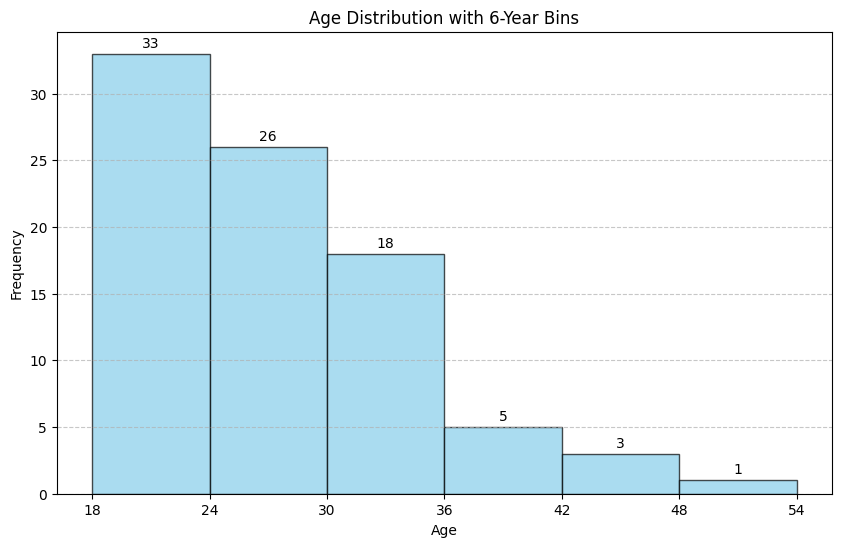

In [ ]:
# Assuming the data is already in a DataFrame `df` with the simplified headers
# Convert the 'Age' column to numeric, handling any errors for non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Adjust bin size to 6 years
bins = range(int(df['Age'].min()), int(df['Age'].max()) + 6, 6)

# Plot age distribution with adjusted bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Age'].dropna(), bins=bins, edgecolor='black', color='skyblue', alpha=0.7)

# Add frequency labels on top of the bars
for i in range(len(n)):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i] + 0.5, str(int(n[i])), ha='center', fontsize=10)

# Set x-ticks to match the bins
plt.xticks(bins)

# Add titles and labels
plt.title('Age Distribution with 6-Year Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the average age on the plot
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1, label=f'Average Age: {average_age:.2f}')
plt.legend()

# Show the plot
plt.show()

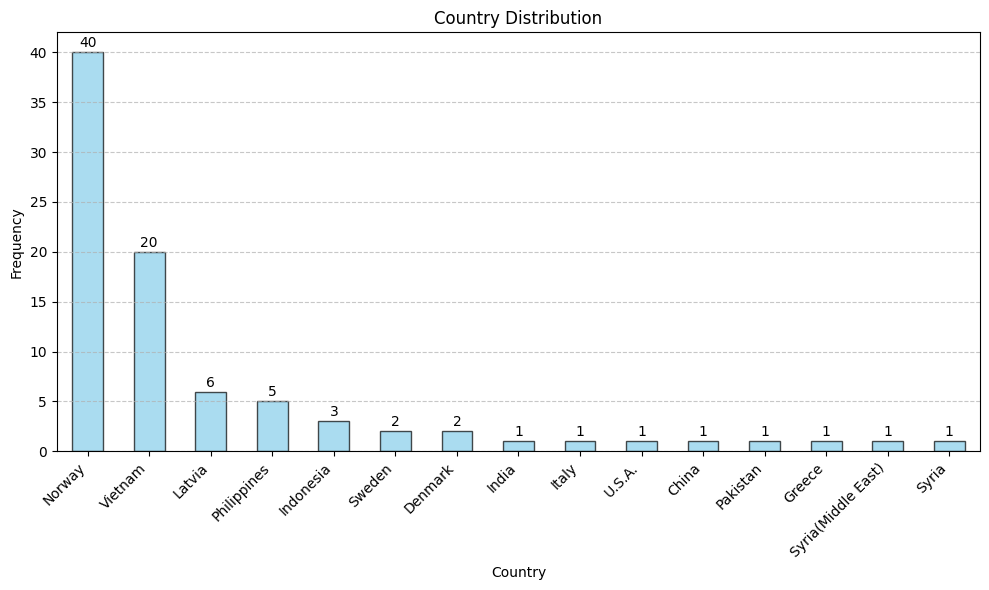

In [ ]:
# Standardize country names
country_map = {
    'norway': 'Norway',
    'norge': 'Norway',
    'iran and norway': 'Norway',
    'viet nam': 'Vietnam',
    'việt nam': 'Vietnam',
    'philippine': 'Philippines',
    'filippinene': 'Philippines',
    'born and raise in the philippines till i was 5 then grew up in oslo': 'Philippines',
}

# Clean and map country names
df['Country'] = df['Country'].str.strip().str.lower().replace(country_map).str.title()

# Count the frequency of each country
country_counts = df['Country'].value_counts()

# Plot the country distribution
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Add frequency labels on top of the bars
for index, value in enumerate(country_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Add titles and labels
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

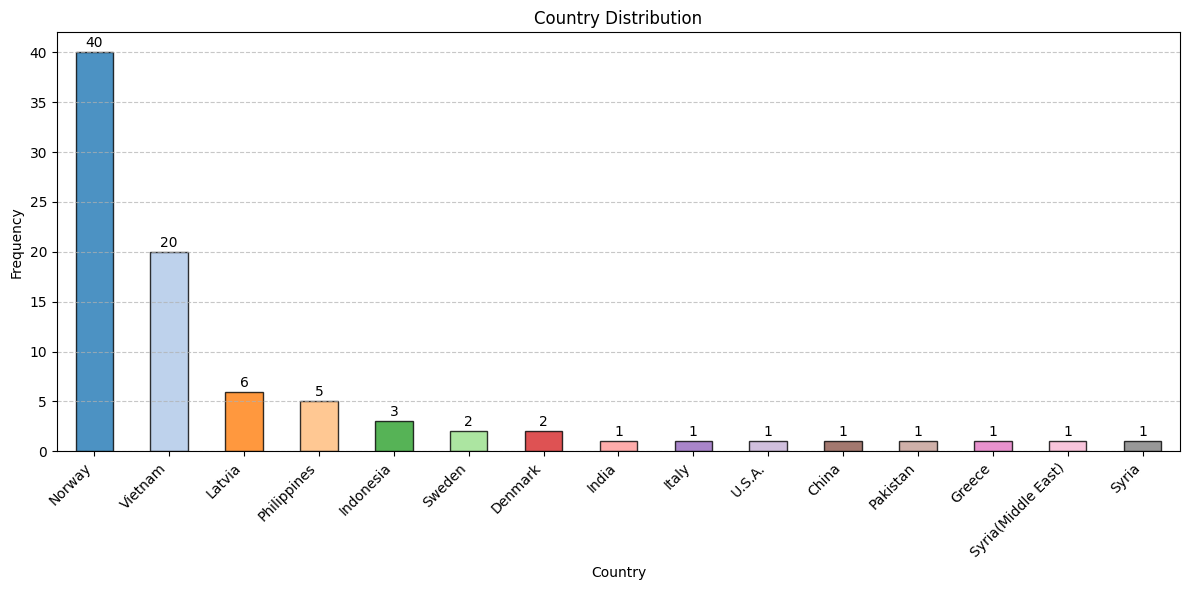

In [ ]:
# Plot the country distribution with different colors for each country
plt.figure(figsize=(12, 6))
colors = plt.cm.tab20(range(len(country_counts)))  # Use a colormap to assign unique colors
country_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)

# Add frequency labels on top of the bars
for index, value in enumerate(country_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Add titles and labels
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


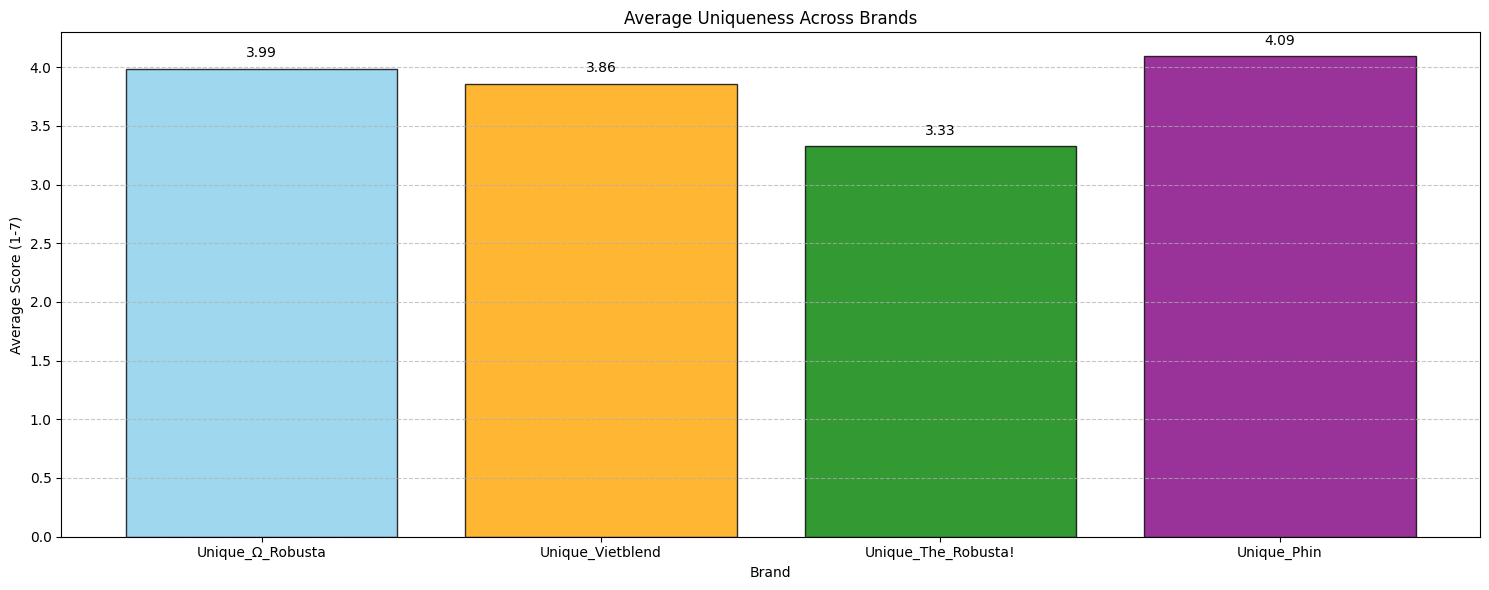

Pairwise Wilcoxon Test Results:
Unique_Ω_Robusta vs Unique_Vietblend: p-value = 0.4649 (Not Significant)
Unique_Ω_Robusta vs Unique_The_Robusta!: p-value = 0.0033 (Significant)
Unique_Ω_Robusta vs Unique_Phin: p-value = 0.6923 (Not Significant)
Unique_Vietblend vs Unique_The_Robusta!: p-value = 0.0218 (Significant)
Unique_Vietblend vs Unique_Phin: p-value = 0.2488 (Not Significant)
Unique_The_Robusta! vs Unique_Phin: p-value = 0.0045 (Significant)


In [ ]:
#Uniqueness

# Select relevant columns
columns_to_compare = ['Unique_Ω_Robusta', 'Unique_Vietblend', 'Unique_The_Robusta!', 'Unique_Phin']

# Calculate average uniqueness for each brand
average_uniqueness = df[columns_to_compare].mean()

# Perform pairwise Wilcoxon tests (for within-subject survey)
significance_results = {}
for i, col1 in enumerate(columns_to_compare):
    for col2 in columns_to_compare[i + 1:]:
        # Drop missing data and perform the test
        paired_data = df[[col1, col2]].dropna()
        stat, p = wilcoxon(paired_data[col1], paired_data[col2])
        significance_results[f"{col1} vs {col2}"] = p

# Plot average uniqueness with means on top and different colors
colors = ['skyblue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 6))
bars = plt.bar(average_uniqueness.index, average_uniqueness, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_uniqueness):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average Uniqueness Across Brands')
plt.ylabel('Average Score (1-7)')
plt.xlabel('Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Display pairwise significance results
print("Pairwise Wilcoxon Test Results:")
for comparison, p_value in significance_results.items():
    print(f"{comparison}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")


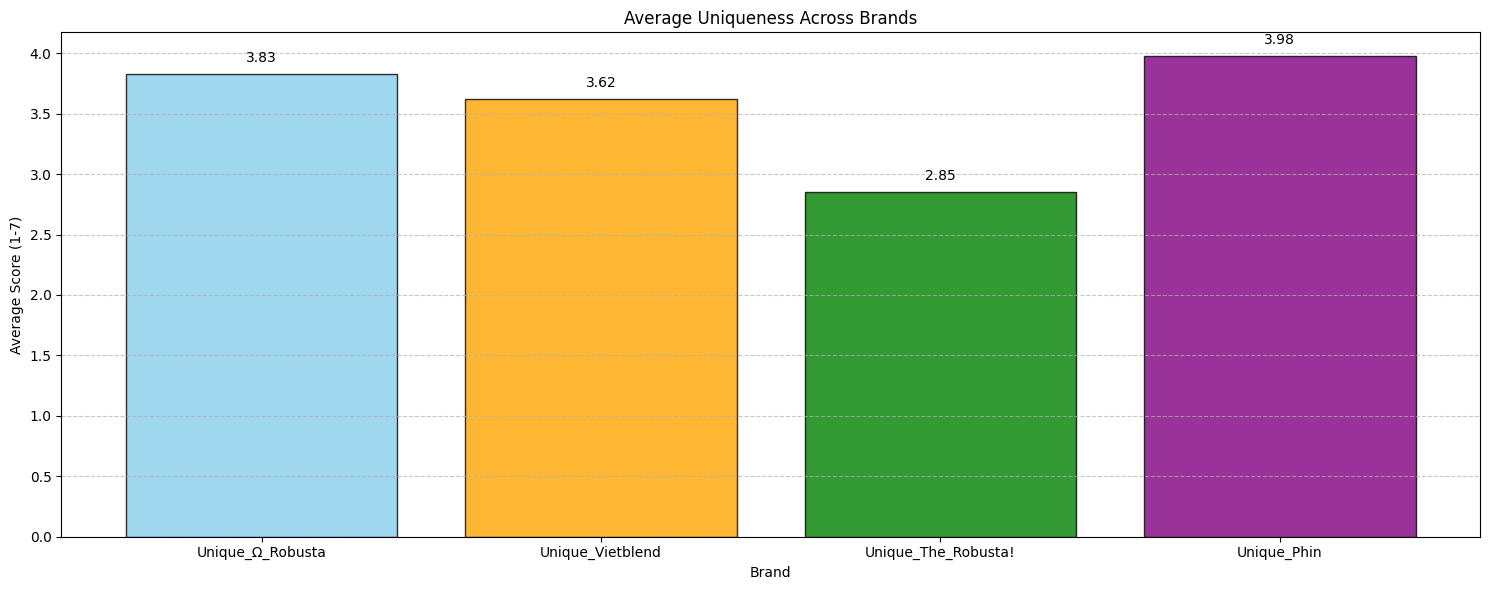

Pairwise Wilcoxon Test Results:
Unique_Ω_Robusta vs Unique_Vietblend: p-value = 0.4649 (Not Significant)
Unique_Ω_Robusta vs Unique_The_Robusta!: p-value = 0.0033 (Significant)
Unique_Ω_Robusta vs Unique_Phin: p-value = 0.6923 (Not Significant)
Unique_Vietblend vs Unique_The_Robusta!: p-value = 0.0218 (Significant)
Unique_Vietblend vs Unique_Phin: p-value = 0.2488 (Not Significant)
Unique_The_Robusta! vs Unique_Phin: p-value = 0.0045 (Significant)


In [ ]:
#Uniqueness

# Select relevant columns
columns_to_compare = ['Unique_Ω_Robusta', 'Unique_Vietblend', 'Unique_The_Robusta!', 'Unique_Phin']

# Calculate average uniqueness for each brand
average_uniqueness = df[columns_to_compare].mean()

# Perform pairwise Wilcoxon tests (for within-subject survey)
significance_results = {}
for i, col1 in enumerate(columns_to_compare):
    for col2 in columns_to_compare[i + 1:]:
        # Drop missing data and perform the test
        paired_data = df[[col1, col2]].dropna()
        stat, p = wilcoxon(paired_data[col1], paired_data[col2])
        significance_results[f"{col1} vs {col2}"] = p

# Plot average uniqueness with means on top and different colors
colors = ['skyblue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 6))
bars = plt.bar(average_uniqueness.index, average_uniqueness, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_uniqueness):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average Uniqueness Across Brands')
plt.ylabel('Average Score (1-7)')
plt.xlabel('Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Display pairwise significance results
print("Pairwise Wilcoxon Test Results:")
for comparison, p_value in significance_results.items():
    print(f"{comparison}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")


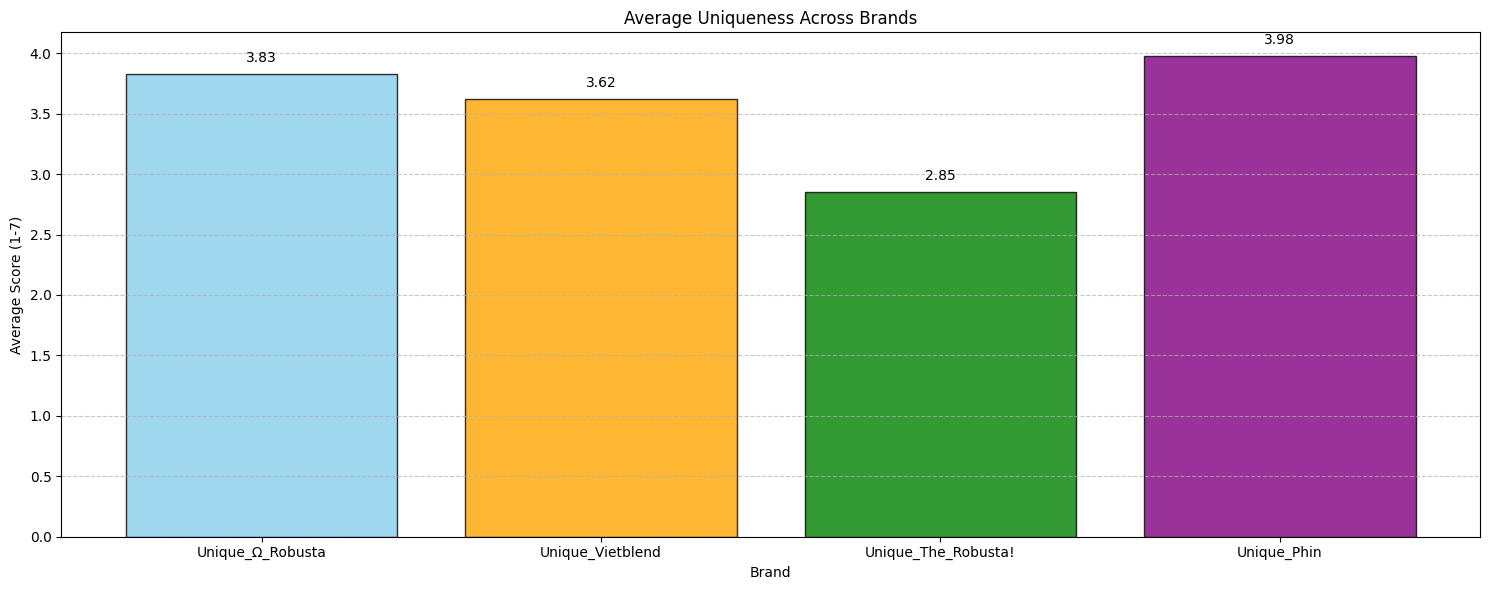

Pairwise Wilcoxon Test Results:
Unique_Ω_Robusta vs Unique_Vietblend: p-value = 0.4649 (Not Significant)
Unique_Ω_Robusta vs Unique_The_Robusta!: p-value = 0.0033 (Significant)
Unique_Ω_Robusta vs Unique_Phin: p-value = 0.6923 (Not Significant)
Unique_Vietblend vs Unique_The_Robusta!: p-value = 0.0218 (Significant)
Unique_Vietblend vs Unique_Phin: p-value = 0.2488 (Not Significant)
Unique_The_Robusta! vs Unique_Phin: p-value = 0.0045 (Significant)


In [ ]:
#Uniqueness

# Select relevant columns
columns_to_compare = ['Unique_Ω_Robusta', 'Unique_Vietblend', 'Unique_The_Robusta!', 'Unique_Phin']

# Calculate average uniqueness for each brand
average_uniqueness = df[columns_to_compare].mean()

# Perform pairwise Wilcoxon tests (for within-subject survey)
significance_results = {}
for i, col1 in enumerate(columns_to_compare):
    for col2 in columns_to_compare[i + 1:]:
        # Drop missing data and perform the test
        paired_data = df[[col1, col2]].dropna()
        stat, p = wilcoxon(paired_data[col1], paired_data[col2])
        significance_results[f"{col1} vs {col2}"] = p

# Plot average uniqueness with means on top and different colors
colors = ['skyblue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 6))
bars = plt.bar(average_uniqueness.index, average_uniqueness, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_uniqueness):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average Uniqueness Across Brands')
plt.ylabel('Average Score (1-7)')
plt.xlabel('Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Display pairwise significance results
print("Pairwise Wilcoxon Test Results:")
for comparison, p_value in significance_results.items():
    print(f"{comparison}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")


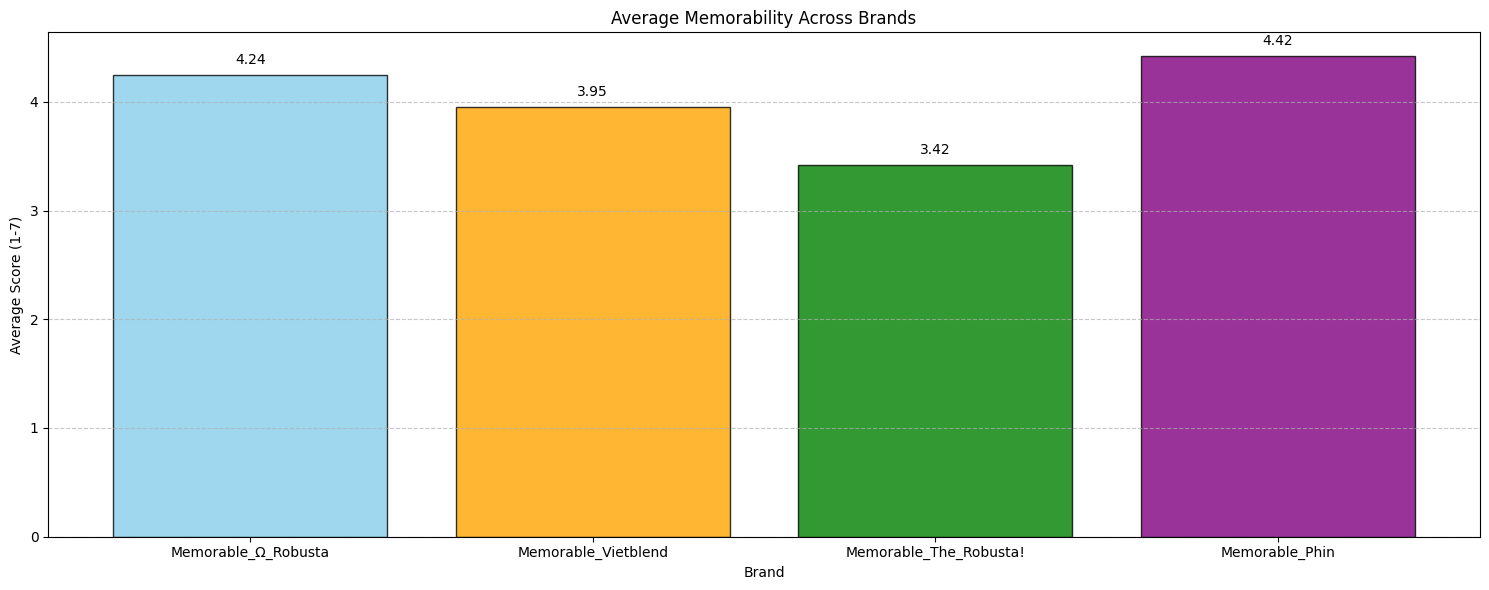

Pairwise Wilcoxon Test Results for Memorability:
Memorable_Ω_Robusta vs Memorable_Vietblend: p-value = 0.1750 (Not Significant)
Memorable_Ω_Robusta vs Memorable_The_Robusta!: p-value = 0.0001 (Significant)
Memorable_Ω_Robusta vs Memorable_Phin: p-value = 0.3097 (Not Significant)
Memorable_Vietblend vs Memorable_The_Robusta!: p-value = 0.0133 (Significant)
Memorable_Vietblend vs Memorable_Phin: p-value = 0.0180 (Significant)
Memorable_The_Robusta! vs Memorable_Phin: p-value = 0.0000 (Significant)


In [ ]:
# Select relevant columns for memorability analysis
columns_to_compare_memorable = ['Memorable_Ω_Robusta', 'Memorable_Vietblend', 'Memorable_The_Robusta!', 'Memorable_Phin']

# Calculate average memorability for each brand
average_memorability = df[columns_to_compare_memorable].mean()

# Perform pairwise Wilcoxon tests (for within-subject survey)
memorability_significance_results = {}
for i, col1 in enumerate(columns_to_compare_memorable):
    for col2 in columns_to_compare_memorable[i + 1:]:
        # Drop missing data and perform the test
        paired_data = df[[col1, col2]].dropna()
        stat, p = wilcoxon(paired_data[col1], paired_data[col2])
        memorability_significance_results[f"{col1} vs {col2}"] = p

# Plot average memorability with means on top and same colors for brands
colors = ['skyblue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 6))
bars = plt.bar(average_memorability.index, average_memorability, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_memorability):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average Memorability Across Brands')
plt.ylabel('Average Score (1-7)')
plt.xlabel('Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Display pairwise significance results for memorability
print("Pairwise Wilcoxon Test Results for Memorability:")
for comparison, p_value in memorability_significance_results.items():
    print(f"{comparison}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")




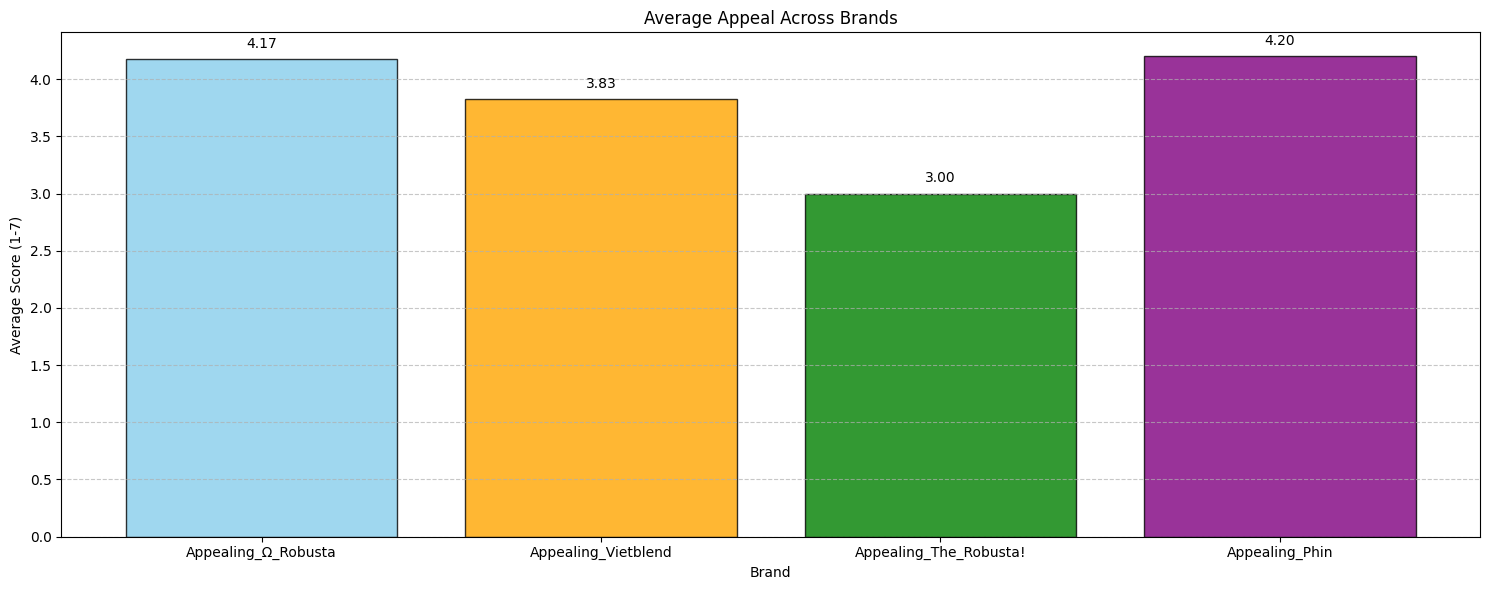

Pairwise Wilcoxon Test Results for Appeal:
Appealing_Ω_Robusta vs Appealing_Vietblend: p-value = 0.2562 (Not Significant)
Appealing_Ω_Robusta vs Appealing_The_Robusta!: p-value = 0.0002 (Significant)
Appealing_Ω_Robusta vs Appealing_Phin: p-value = 0.0781 (Not Significant)
Appealing_Vietblend vs Appealing_The_Robusta!: p-value = 0.0039 (Significant)
Appealing_Vietblend vs Appealing_Phin: p-value = 0.0064 (Significant)
Appealing_The_Robusta! vs Appealing_Phin: p-value = 0.0000 (Significant)


In [ ]:
# Select relevant columns for appealing analysis
columns_to_compare_appealing = ['Appealing_Ω_Robusta', 'Appealing_Vietblend', 'Appealing_The_Robusta!', 'Appealing_Phin']

# Calculate average appealing score for each brand
average_appealing = df2[columns_to_compare_appealing].mean()

# Perform pairwise Wilcoxon tests (for within-subject survey)
appealing_significance_results = {}
for i, col1 in enumerate(columns_to_compare_appealing):
    for col2 in columns_to_compare_appealing[i + 1:]:
        # Drop missing data and perform the test
        paired_data = df[[col1, col2]].dropna()
        stat, p = wilcoxon(paired_data[col1], paired_data[col2])
        appealing_significance_results[f"{col1} vs {col2}"] = p

# Plot average appealing score with means on top and same colors for brands
colors = ['skyblue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 6))
bars = plt.bar(average_appealing.index, average_appealing, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_appealing):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average Appeal Across Brands')
plt.ylabel('Average Score (1-7)')
plt.xlabel('Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Display pairwise significance results for appealing
print("Pairwise Wilcoxon Test Results for Appeal:")
for comparison, p_value in appealing_significance_results.items():
    print(f"{comparison}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")


<ipython-input-41-ab0c581350af>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_likelihood = df2.groupby('Tried_Robusta')['Try_Robusta_Norway'].mean()


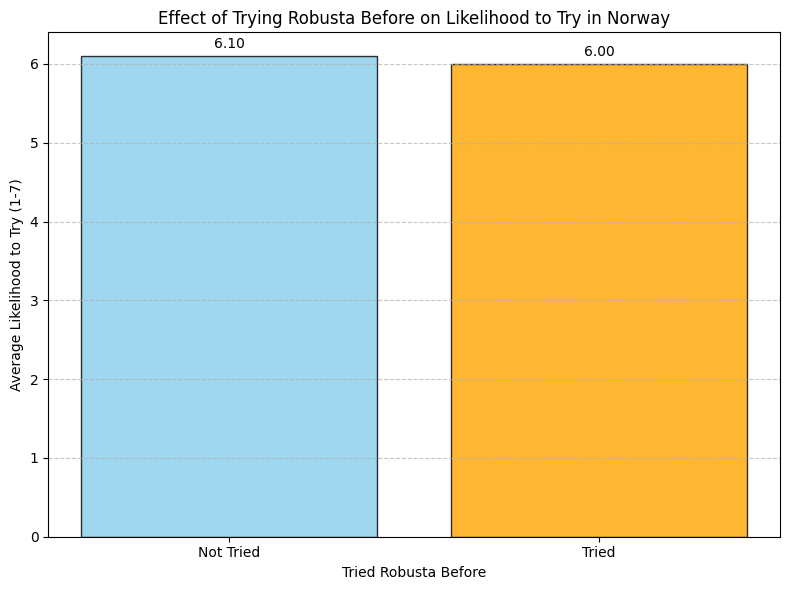

Mann-Whitney U Test p-value: 0.2275
No significant difference found between groups.


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Calculate the average likelihood to try for each group (Tried vs Not Tried)
average_likelihood = df2.groupby('Tried_Robusta')['Try_Robusta_Norway'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'orange']  # Define colors for the bars
bars = plt.bar(average_likelihood.index, average_likelihood, color=colors, edgecolor='black', alpha=0.8)

# Add mean labels on top of each bar
for bar, mean in zip(bars, average_likelihood):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{mean:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Effect of Trying Robusta Before on Likelihood to Try in Norway')
plt.xlabel('Tried Robusta Before')
plt.ylabel('Average Likelihood to Try (1-7)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Perform a Mann-Whitney U Test to check for statistical significance
# Drop missing data
tried_data = df[df['Tried_Robusta'] == 'Tried']['Try_Robusta_Norway'].dropna()
not_tried_data = df[df['Tried_Robusta'] == 'Not Tried']['Try_Robusta_Norway'].dropna()

stat, p_value = mannwhitneyu(tried_data, not_tried_data)
print(f"Mann-Whitney U Test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference found between groups.")
else:
    print("No significant difference found between groups.")


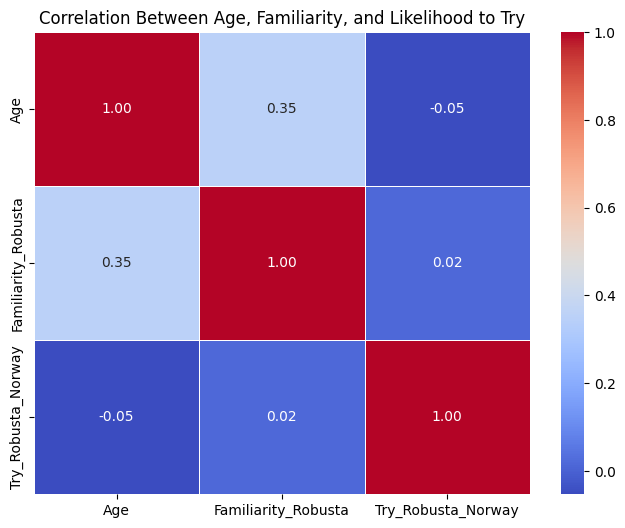

In [ ]:
#correlations matrix
# Select relevant columns for correlation analysis
correlation_columns = ['Age', 'Familiarity_Robusta', 'Try_Robusta_Norway']

# Calculate the correlation matrix
correlation_matrix = df2[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title('Correlation Between Age, Familiarity, and Likelihood to Try')
plt.show()

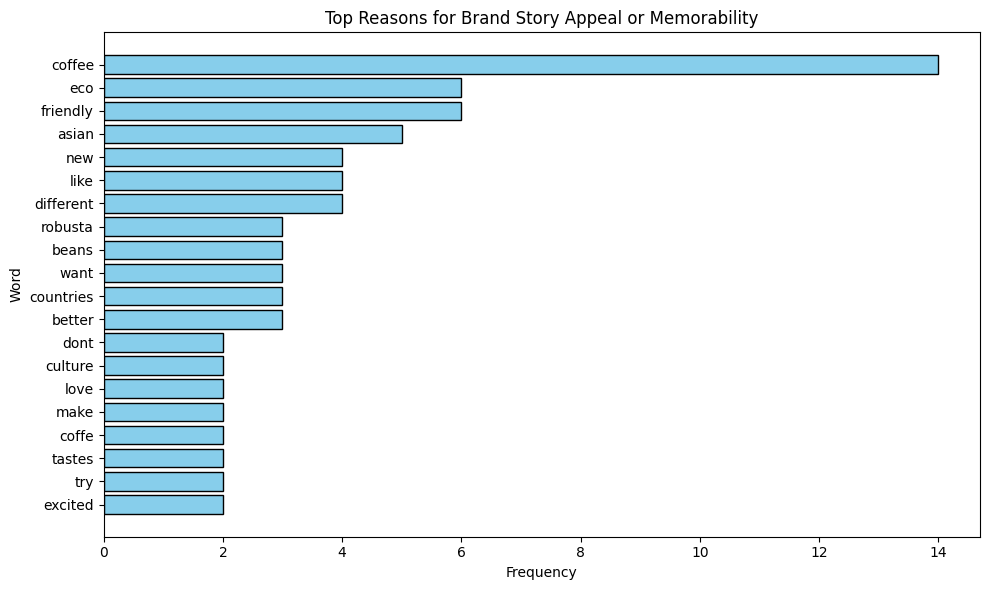

,Word,Frequency
4,coffee,14
9,eco,6
11,friendly,6
0,asian,5
15,new,4
12,like,4
7,different,4
16,robusta,3
1,beans,3
19,want,3


In [ ]:
# Assuming the column is named 'Memorable_Brand_Story'
text_column = 'Memorable_Brand_Story'

# Preprocess the text data: drop missing values and convert to lowercase
text_data = df2[text_column].dropna().str.lower()

# Use CountVectorizer to tokenize and count word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 words excluding stop words
word_counts = vectorizer.fit_transform(text_data)

# Convert the word counts into a DataFrame for easier manipulation
word_freq_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_counts.toarray().sum(axis=0)
})

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top words
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top Reasons for Brand Story Appeal or Memorability')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

# Display the top words and frequencies
word_freq_df.head(10)


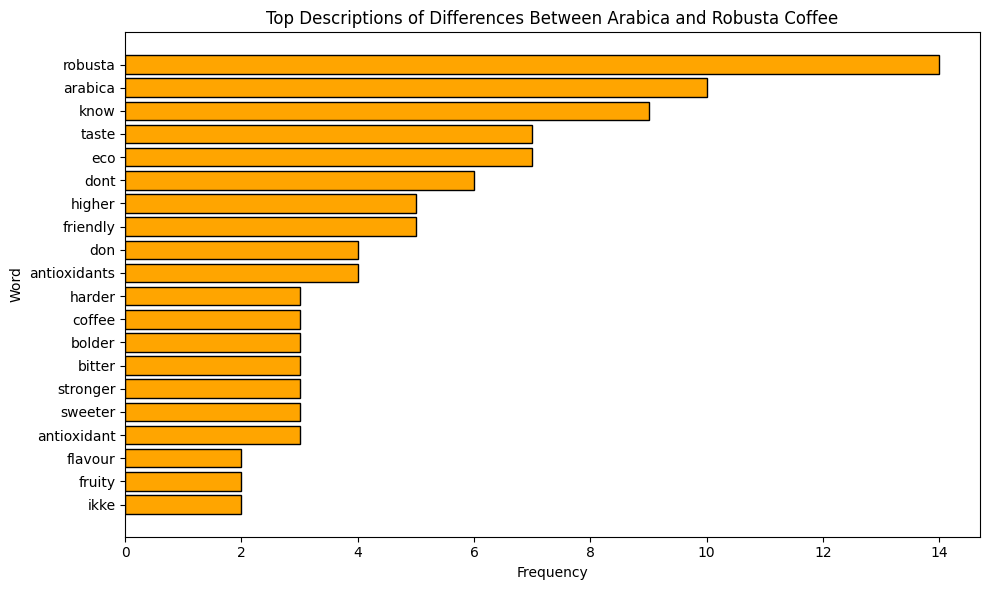

,Word,Frequency
16,robusta,14
2,arabica,10
15,know,9
19,taste,7
8,eco,7
7,dont,6
13,higher,5
10,friendly,5
6,don,4
1,antioxidants,4


In [ ]:
# Assuming the column is named 'Arabica_vs_Robusta'
text_column_arabica_robusta = 'Arabica_vs_Robusta'

# Preprocess the text data: drop missing values and convert to lowercase
text_data_arabica_robusta = df2[text_column_arabica_robusta].dropna().str.lower()

# Use CountVectorizer to tokenize and count word frequencies
vectorizer_arabica_robusta = CountVectorizer(stop_words='english', max_features=20)  # Top 20 words excluding stop words
word_counts_arabica_robusta = vectorizer_arabica_robusta.fit_transform(text_data_arabica_robusta)

# Convert the word counts into a DataFrame for easier manipulation
word_freq_df_arabica_robusta = pd.DataFrame({
    'Word': vectorizer_arabica_robusta.get_feature_names_out(),
    'Frequency': word_counts_arabica_robusta.toarray().sum(axis=0)
})

# Sort the DataFrame by frequency
word_freq_df_arabica_robusta = word_freq_df_arabica_robusta.sort_values(by='Frequency', ascending=False)

# Plot the top words
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df_arabica_robusta['Word'], word_freq_df_arabica_robusta['Frequency'], color='orange', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top Descriptions of Differences Between Arabica and Robusta Coffee')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

# Display the top words and frequencies
word_freq_df_arabica_robusta.head(10)


In [ ]:
# Filter the DataFrame to include only participants from Norway
norway_data = df[df['Country'].str.strip().str.lower().isin(['norway', 'norge'])]
df2=norway_data